In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('./lib/')

from asymtopia import draw_coins_flip, draw_n_dice

# Asymtopia

## Asymptotics

***Asymptotics*** is the term for the behavior of statistics as the sample size limits to infinity. Asymptotics are incredibly useful for simple statistical inference and approximations. Asymptotics often make hard problems easy and difficult calculations simple. We will not cover the philosophical considerations in this book, but is true nonetheless, that asymptotics often lead to nice understanding of procedures. In fact, the ideas of asymptotics are so important form the basis for frequency interpretation of probabilities by considering the long run proportion of times an event occurs. 

Some things to bear in mind about the seemingly magical nature of asymptotics. ***There’s no free lunch and unfortunately, asymptotics generally give no assurances about finite sample performance***.

## Limits of random variables

We’ll only talk about the limiting behavior of one statistic, the sample mean. Fortunately, for the sample mean there’s a set of powerful results. These results allow us to talk about the large sample distribution of sample means of a collection of iid observations.

The first of these results we intuitively already know. It says that ***the average limits to what its estimating, the population mean***. This result is called the ***Law of Large Numbers***. It simply says that if you go to the trouble of collecting an infinite amount of data, you estimate the population mean perfectly. Note there’s sampling assumptions that have to hold for this result to be true. The data have to be iid.

A great example of this comes from coin flipping. Imagine if $\bar{X}_{n}$ is the average of the result of $n$ coin flips (i.e. the sample proportion of heads). The Law of Large Numbers states that as we flip a coin over and over, it eventually converges to the true probability of a head.

## Law of Large Numbers in action

Let’s try using simulation to investigate the law of large numbers in action. Let’s simulate a lot of standard normals and plot the cumulative means. If the LLN is correct, the line should converge to
0, the mean of the standard normal distribution.

Text(0, 0.5, 'Cumulative mean')

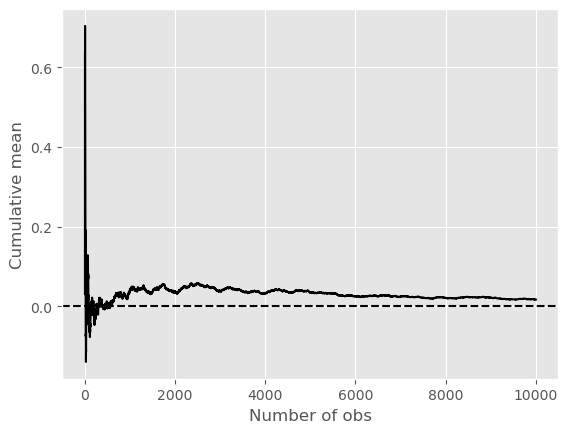

In [2]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

n = 10000
y = np.cumsum(norm.rvs(size = n, loc = 0, scale = 1))/np.arange(1,n+1)

sns.lineplot(
    x = np.arange(1, n+1),
    y = y,
    color = 'k'
);


plt.axhline(y = 0, linestyle = '--', color = 'k')
plt.xlabel('Number of obs')
plt.ylabel('Cumulative mean')

## Law of large numbers in action, coin flip

Let’s try the same thing, but for a fair coin flip. We’ll simulate a lot of coin flips and plot the cumulative proportion of heads.

Text(0, 0.5, 'Cumulative mean')

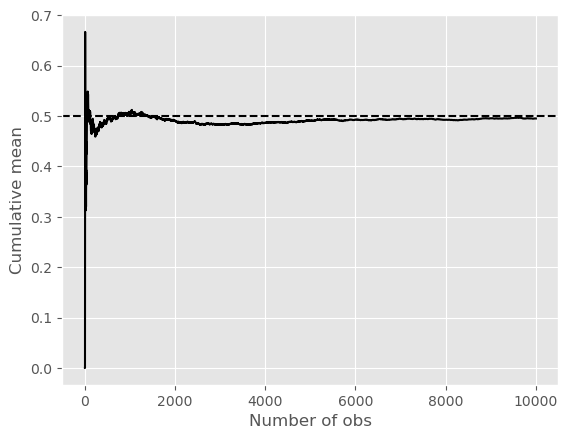

In [3]:
np.random.seed(100)
n = 10000

x = np.arange(1, n+1)
y = np.cumsum(np.random.choice([0,1], size = n))/np.arange(1,n+1)

sns.lineplot(
    x = x,
    y = y,
    color = 'k'
);

plt.axhline(y = 0.5, linestyle = '--', color = 'k')

plt.xlabel('Number of obs')
plt.ylabel('Cumulative mean')

## Discussion

An estimator is called ***consistent*** if it converges to what you want to estimate. Thus, the LLN says that the sample mean of iid sample is consistent for the population mean. Typically, good estimators
are consistent; it’s not too much to ask that if we go to the trouble of collecting an infinite amount of data that we get the right answer. The sample variance and the sample standard deviation of iid random variables are consistent as well.

## The Central Limit Theorem

The ***Central Limit Theorem*** (CLT) is one of the most important theorems in statistics. For our purposes, the CLT states that the distribution of averages of iid variables becomes that of a standard normal as the sample size increases. Consider this fact for a second. We already know the mean and standard deviation of the distribution of averages from iid samples. The CLT gives us an approximation to the full distribution! Thus, for iid samples, we have a good sense of distribution of the average event though: (1) we only observed one average and (2) we don’t know what the population distribution is. Because of this, the CLT applies in an endless variety of settings and is one of the most important theorems ever discovered.

The formal result is that:

$$
\frac{\bar{X}_{n} - \mu}{\sigma / \sqrt{n}} = \frac{\sqrt{n}(\bar{X}_{n} - \mu)}{\sigma} = \frac{\text{Estimate - Mean of estimate}}{\text{Std. Err. of estimate}}
$$

has a distribution like that of a standard normal for large $n$. Replacing the standard error by its estimated value doesn’t change the CLT. The useful way to think about the CLT is that $\bar{X}_{n}$ is approximately $\mathcal{N}(\mu, \sigma^{2}/n)$

## CLT simulation experiments

Let’s try simulating lots of averages from various distributions and showing that the resulting distribution looks like a bell curve.

### Die rolling

- Simulate a standard normal random variable by rolling $n$ (six sided) dice.
- Let $X_{i}$ be the outcome for die $i$.
- Then note that $\mu = E[X_{i}] = 3.5$.
- Recall also that $Var(X_{i}) = 2.92$.
- SE $\sqrt{2.92} / n = 1.71 / \sqrt{n}$.
- Lets roll $n$ dice, take their mean, subtract off $3.5$, and divide by $1.71/\sqrt{n}$ and repeat this over and over.

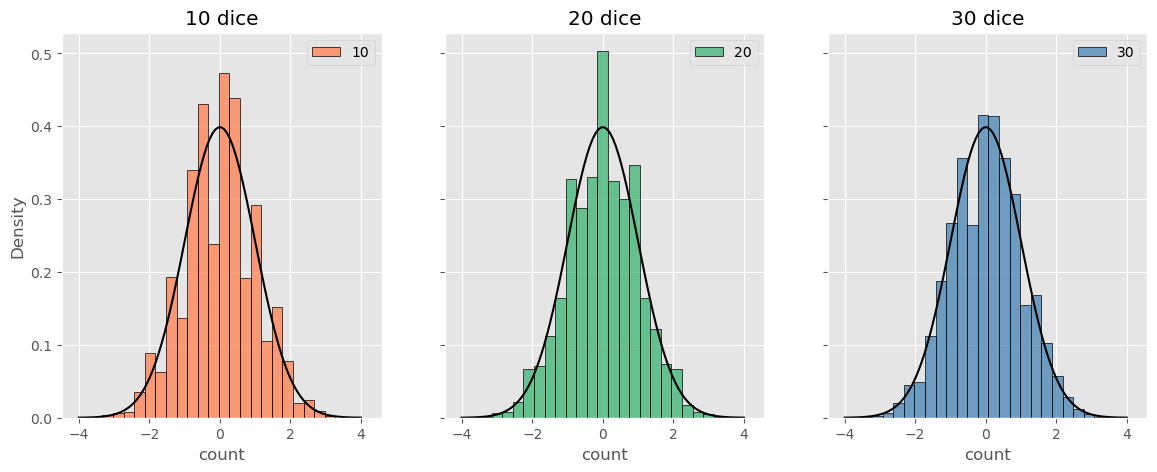

In [4]:
draw_n_dice(figsize=(14,5))

It’s pretty remarkable that the approximation works so well with so few rolls of the die. So, if you’re stranded on an island, and need to simulate a standard normal without a computer, but you do have a die, you can get a pretty good approximation with 10 rolls even.

### Coin CLT

In fact the oldest application of the CLT is to the idea of flipping coins ([by de Moivre](https://en.wikipedia.org/wiki/De_Moivre%E2%80%93Laplace_theorem)). Let $X_{i}$ be the $0$ or $1$ result of the ith flip of a possibly unfair coin. The sample proportion, say $\hat{p}$, is the average of the coin flips. We know that:

- $E[X_{i}] = p$
- $Var(X_{i}) = p \cdot (1-p)$
- $\sqrt{Var(\hat{p})} = \sqrt{p \cdot(1-p)/n}$

Furthermore, because of the CLT, we also know that:

$$
\frac{\hat{p} - p}{\sqrt{p \cdot(1-p)/n}}
$$

will be approximately normally distributed.

Let’s test this by flipping a coin $n$ times, taking the sample proportion of heads, subtract off $0.5$ and multiply the result by $2 \cdot \sqrt{n}$ (divide by $1/(2 \cdot \sqrt{n}$)).

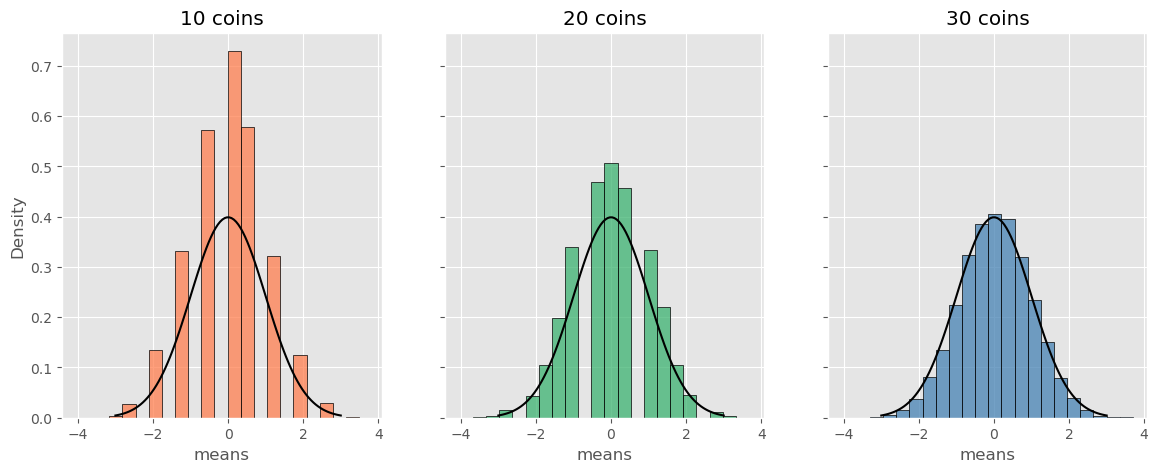

In [5]:
draw_coins_flip(figsize=(14,5))

This convergence doesn’t look quite as good as the die, since the coin has fewer possible outcomes. In fact, among coins of various degrees of bias, the convergence to normality is governed by how far from 0.5 $p$ is. Let’s redo the simulation, now using $p = 0.9$ instead of $p = 0.5$ like we did before.

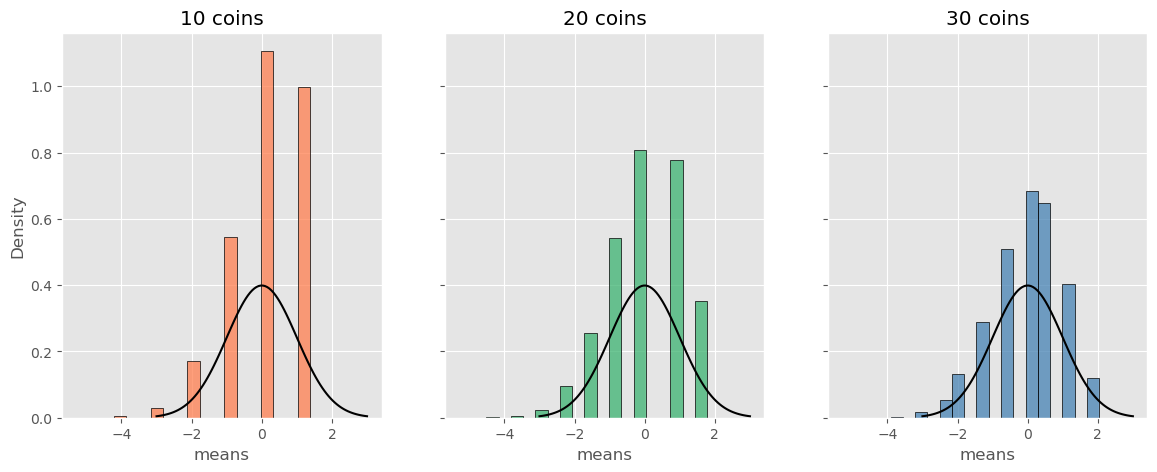

In [6]:
draw_coins_flip(p = 0.9, figsize=(14,5))

Notice that the convergence to normality is quite poor. Thus, be careful when using CLT approximations for sample proportions when your proportion is very close to 0 or 1.

## Confidence intervals

Confidence intervals are methods for quantifying uncertainty in our estimates. The fact that the interval has width characterizes that there is randomness that prevents us from getting a perfect estimate. Let’s go through how a confidence interval using the CLT is constructed.

According to the CLT, the sample mean, $\bar{X}$, is approximately normal with mean $\mu$ and standard deviation $\sigma /\sqrt{n}$. Furthermore,

$$
\mu + 2\sigma/\sqrt{n}
$$

is pretty far out in the tail (only $2.5 \%$ of a normal being larger that $2$ standard deviations in the tail). Similarly, 

$$
\mu - 2\sigma/\sqrt{n}
$$

is pretty far in the left tail (only $2.5 \%$ chance of a normal being smaller than $2$ standard deviations in the tail). So the probability $\bar{X}$ is bigger than $\mu + 2 \sigma / \sqrt{n}$ or smaller than $\mu - 2 \sigma / \sqrt{n}$ is 5%. Or equivalently, the probability that these limits contain $\mu$ is 95%. The quantity:

$$
\bar{X} \pm 2\sigma/\sqrt{n}
$$

is called a $95 \%$ interval for $\mu$. The $95 \%$ refers to the fact that if one were to repeatedly get samples of size $n$, about $95 \%$ of the intervals obtained would contain $\mu$. The $97.5^{th}$ quantile is $1.96$ (so I rounded to 2 above). If instead of a $95 \%$ interval, you wanted a $90 \%$ interval, then you want $(100 - 90) / 2 = 5 \%$ in each tail. Thus your replace the $2$ with the $95^{th}$ percentile, which is $1.645$.

### Example CI

Give a confidence interval for the average height of sons in Galton’s data.

In [7]:
df_father_sons = pd.read_csv('./data/father_son.csv')

x = df_father_sons['sheight']

sigma = x.std()/np.sqrt(len(x))
np.round((x.mean() + (np.array([-1,1]) * norm.ppf(0.975) * sigma))/12,3)

array([5.71 , 5.738])

Here we divided by $12$ to get our interval in feet instead of inches. So we estimate the average height of the sons as $5.71$ to $5.74$ with $95 \%$ confidence.

### Example using the sample proportions

In the event that each $X_{i}$ is $0$ or $1$ with common success probability $p$ then $\sigma^{2} = p(1 − p)$. The interval takes the form:

$$
\hat{p} \pm z_{1-\alpha} \sqrt{\frac{p(1-p)}{n}}
$$

Replacing $p$ by $\hat{p}$ in the standard error results in what is called a ***Wald confidence interval for $p$***. Remember also that $p(1 − p)$ is maximized at $1/4$. Plugging this in and setting our $Z$ quantile as $2$ (which is about a $95 \%$ interval) we find that a quick and dirty confidence interval is:

$$
\hat{p} \pm \frac{1}{\sqrt{n}}
$$

This is useful for doing quick confidence intervals for binomial proportions in your head.

### Example

Your campaign advisor told you that in a random sample of $100$ likely voters, 56 intent to vote for you. Can you relax? Do you have this race in the bag? Without access to a computer or calculator, how precise is this estimate?

In [8]:
1/np.sqrt(100)

0.1

so a back of the envelope calculation gives an approximate $95 \%$ interval of $(0.46, 0.66)$.

Thus, since the interval contains $0.5$ and numbers below it, there’s not enough votes for you to relax; better go do more campaigning! The basic rule of thumb is then, $1/\sqrt{n}$ gives you a good estimate for the margin of error of a proportion. Thus, $n = 100$ for about $1$ decimal place, $10,000$ for $2$, $1,000,000$ for $3$.

In [9]:
np.round(1/np.sqrt(10**np.arange(1,7)),3)

array([0.316, 0.1  , 0.032, 0.01 , 0.003, 0.001])

We could very easily do the full Wald interval, which is less conservative (may provide a narrower interval). Remember the Wald interval for a binomial proportion is:

$$
\hat{p} \pm Z_{1-\alpha} \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
$$

Here's the Python code for our elezion setting, both coding it directly and using `scipy.stats.binomtest` module.

In [10]:
from scipy.stats import binomtest

p = 0.56
n = 100
sigma = np.sqrt(p*(1-p)/n)

print(np.round(0.56 + (np.array([-1,1]) * norm.ppf(0.975) * sigma),4))
print(np.round(binomtest(56,100, p = 0.5).proportion_ci(confidence_level=0.95, method='exact'), 4))

[0.4627 0.6573]
[0.4572 0.6592]


### Simulation of confidence intervals

It is interesting to note that the coverage of confidence intervals describes an aggregate behavior. In other words the confidence interval describes the percentage of intervals that would cover the parameter being estimated if we were to repeat the experiment over and over. So, one can not technically say that the interval contains the parameter with probability 95%, say. So called Bayesian credible intervals address this issue at the expense (or benefit depending on who you ask) of adopting a Bayesian framework.

For our purposes, we’re using confidence intervals and so will investigate their frequency performance over repeated realizations of the experiment. We can do this via simulation. Let’s consider different values of $p$ and look at the Wald interval’s coverage when we repeatedly create confidence intervals.

In [11]:
# n = 20
# pvals = np.arange(0.1,0.91,step = 0.05)

# nosim = 1000


In [12]:
# from scipy.stats import binom
# p = 0.1
# n = 20
# n_sim = 1000

# phats = binom.rvs(n = n ,p = p,size = n_sim)/n
# low_l = phats - (norm.ppf(0.975) * np.sqrt(phats*(1-phats)/n))
# upp_l = phats + (norm.ppf(0.975) * np.sqrt(phats*(1-phats)/n))

# np.mean((low_l < p) & (upp_l > p))

Text(0.5, -0.25, 'Plot of Wald interval coverage')

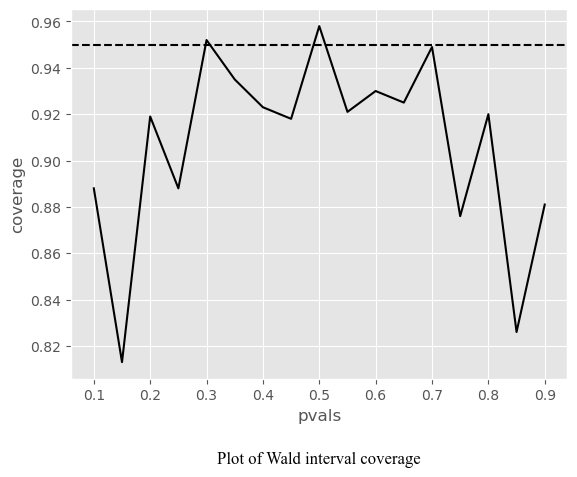

In [13]:
from scipy.stats import binom
p_vals = np.arange(0.1,0.91,step = 0.05)
n = 20
n_sim = 1000

means = []
for p in p_vals:
    phats = binom.rvs(n = n ,p = p,size = n_sim)/n
    low_l = phats - (norm.ppf(0.975) * np.sqrt(phats*(1-phats)/n))
    upp_l = phats + (norm.ppf(0.975) * np.sqrt(phats*(1-phats)/n))
    means.append(np.mean((low_l < p) & (upp_l > p)))

means = np.array(means)

sns.lineplot(
    x = p_vals,
    y = means,
    color = 'k'
)

plt.axhline(y = 0.95, color = 'k',linestyle = '--');
plt.xlabel('pvals')
plt.ylabel('coverage')

csfont = {'fontname':'Times New Roman'}
plt.title('Plot of Wald interval coverage', y=-0.25, fontsize = 12, **csfont)

The figure shows that if we were to repeatedly try experiments for any fixed value of $p$, it’s rarely the case that our intervals will cover the value that they’re trying to estimate in $95 \%$ of them. This is bad, since covering the parameter that its estimating 95% of the time is the confidence interval’s only job!

So what’s happening? Recall that the CLT is an approximation. In this case $n$ isn’t large enough for the CLT to be applicable for many of the values of $p$. Let’s see if the coverage improves for larger $n$.

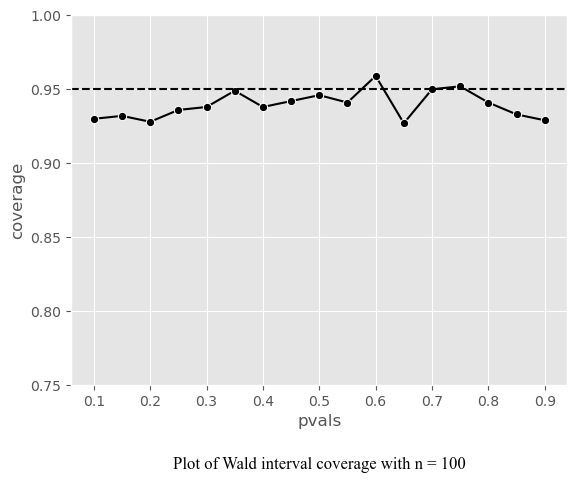

In [14]:
p_vals = np.arange(0.1,0.91,step = 0.05)
n = 100
n_sim = 1000

means = []
for p in p_vals:
    phats = binom.rvs(n = n ,p = p,size = n_sim)/n
    low_l = phats - (norm.ppf(0.975) * np.sqrt(phats*(1-phats)/n))
    upp_l = phats + (norm.ppf(0.975) * np.sqrt(phats*(1-phats)/n))
    means.append(np.mean((low_l < p) & (upp_l > p)))

means = np.array(means)

sns.lineplot(
    x = p_vals,
    y = means,
    marker = 'o',
    color = 'k'
)

plt.axhline(y = 0.95, color = 'k',linestyle = '--');
plt.xlabel('pvals')
plt.ylabel('coverage')
plt.ylim(0.75, 1)

csfont = {'fontname':'Times New Roman'}
plt.title('Plot of Wald interval coverage with n = 100', y=-0.25, fontsize = 12, **csfont);

Now it looks much better. Of course, increasing our sample size is rarely an option. There’s exact fixes to make this interval work better for small sample sizes.

However, for a quick fix is to take your data and add two successes and two failures. So, for example, in our election example, we would form our interval with 58 votes out of 104 sampled (disregarding that the actual numbers were 56 and 100). This interval is called the ***Agresti/Coull interval***. This interval has much better coverage. Let’s show it via a simulation.

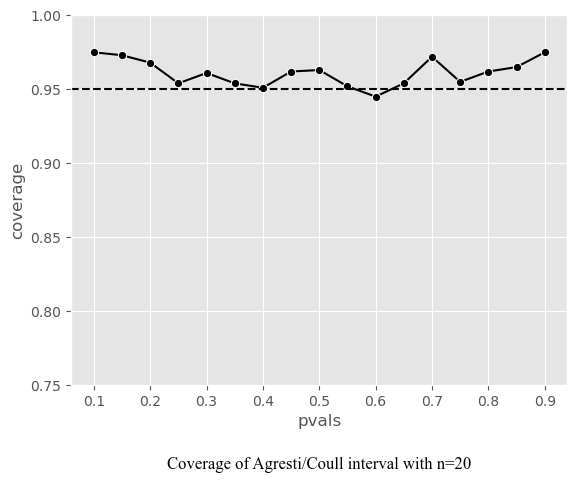

In [15]:
p_vals = np.arange(0.1,0.91,step = 0.05)
n = 100
n_sim = 1000

means = []
for p in p_vals:
    phats = (binom.rvs(n = n ,p = p,size = n_sim)+2)/(n+4)
    low_l = phats - (norm.ppf(0.975) * np.sqrt(phats*(1-phats)/n))
    upp_l = phats + (norm.ppf(0.975) * np.sqrt(phats*(1-phats)/n))
    means.append(np.mean((low_l < p) & (upp_l > p)))

means = np.array(means)

sns.lineplot(
    x = p_vals,
    y = means,
    marker = 'o',
    color = 'k'
)

plt.axhline(y = 0.95, color = 'k',linestyle = '--');
plt.xlabel('pvals')
plt.ylabel('coverage')
plt.ylim(0.75, 1)

csfont = {'fontname':'Times New Roman'}
plt.title('Coverage of Agresti/Coull interval with n=20', y=-0.25, fontsize = 12, **csfont);

The coverage is better, if maybe a little conservative in the sense of being over the $95 \%$ line most of the time. If the interval is too conservative, it’s likely a little too wide. To see this clearly, imagine if we made our interval $-\infty$ to $+\infty$. Then we would always have 100% coverage in any setting, but the interval wouldn’t be useful. Nonetheless, the Agrestic/Coull interval gives a much better trade off between coverage and width than the Wald interval.

In general, one should use the add two successes and failures method for binomial confidence intervals with smaller $n$. For very small $n$ consider using an exact interval (not covered in this class).

## Poisson interval

Since the Poisson distribution is so central for data science, let's do a Poisson confidence interval. Remember that if $X \sim \text{Poisson}(\lambda t)$ then our estimate of $\lambda$ is $\hat{\lambda} = X/t$. Furthermore, we know that $Var(\hat{\lambda}) = \lambda/t$ and so the natural estimate is $\hat{\lambda}/t$. While it's not immediate how the CLT applies in this case, the interval is of the familiar form:

$$
\text{Estimate} \pm Z_{1-\alpha/2}\text{SE}
$$

So our Poisson interval is:

$$
\hat{\lambda} \pm Z_{1-\alpha /2} \sqrt{\frac{\hat{\lambda}}{t}}
$$

### Example

A nuclear pump failed $5$ times out of $94.32$ days. Give a $95 \%$ confidence interval for the failure rate per day.

In [16]:
from scipy.stats import poisson

x = 5
t = 94.32
lambda_ = x/t
se = np.sqrt(lambda_/t)

np.round(lambda_ + np.array([-1,1])*norm.ppf(0.975)*se,5)


array([0.00655, 0.09948])

A non-asymptotic test, one that guarantees coverage, is also available. But, it has to be evaluated numerically.

In [17]:
import statsmodels.stats.proportion as smp

# Given data
failures = 5  # number of failures
days = 94.32  # observation period in days
alpha = 0.05  # significance level for 95% confidence interval

# Calculate the rate of failures per day
rate_per_day = failures / days

# Calculate the confidence interval for the Poisson-distributed data
# Using 'poisson' method to directly compute the Poisson interval
np.round(smp.proportion_confint(failures, days, alpha=alpha, method='beta'), 5)

array([0.01743, 0.11939])

### Simulating the Poisson coverage rate

Let’s see how the asymptotic interval performs for lambda values near what we’re estimating.

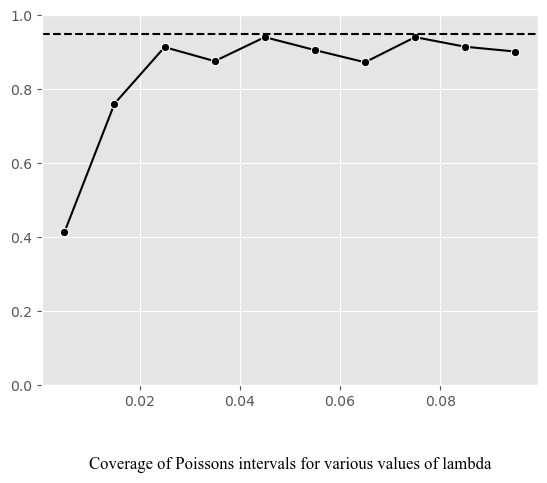

In [18]:
means = []
n_sim = 1000
x = np.arange(0.005,0.1,0.01)

for lambdas in x:
    lambda_ = lambdas
    t = 100
    lhats = poisson.rvs(lambda_*t, size = n_sim)/t
    ll = lhats-norm.ppf(0.975)*np.sqrt(lhats/t)
    ul = lhats+norm.ppf(0.975)*np.sqrt(lhats/t)
    means.append(np.mean((ll < lambda_) & (lambda_ < ul)))

means = np.array(means)

sns.lineplot(
    x = x,
    y = means,
    marker = 'o',
    color = 'k'
)

plt.ylim(0.0, 1)
plt.axhline(y = 0.95, linestyle = '--', color = 'k')

csfont = {'fontname':'Times New Roman'}
plt.title('Coverage of Poissons intervals for various values of lambda', y=-0.25, fontsize = 12, **csfont);

The coverage can be low for low values of lambda. In this case the asymptotics works as we increase the monitoring time, $t$. Here’s the coverage if we increase t to 1,000.

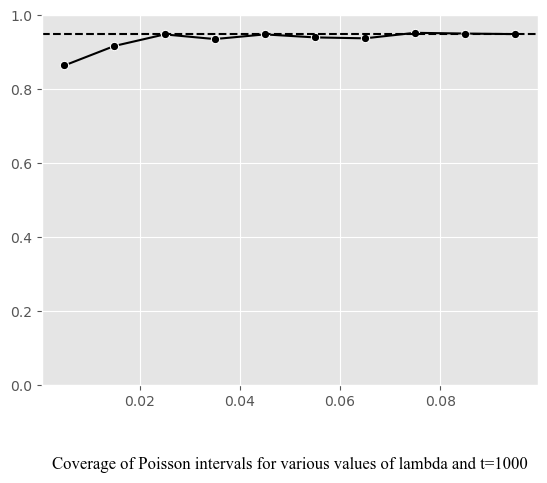

In [19]:
means = []
n_sim = 10000
x = np.arange(0.005,0.1,0.01)
t = 1000

for lambdas in x:
    lambda_ = lambdas    
    lhats = poisson.rvs(lambda_*t, size = n_sim)/t
    ll = lhats-norm.ppf(0.975)*np.sqrt(lhats/t)
    ul = lhats+norm.ppf(0.975)*np.sqrt(lhats/t)
    means.append(np.mean((ll < lambda_) & (lambda_ < ul)))

means = np.array(means)

sns.lineplot(
    x = x,
    y = means,
    marker = 'o',
    color = 'k'
)

plt.ylim(0.0, 1)
plt.axhline(y = 0.95, linestyle = '--', color = 'k');

csfont = {'fontname':'Times New Roman'}
plt.title('Coverage of Poisson intervals for various values of lambda and t=1000', y=-0.25, fontsize = 12, **csfont);

## Summary notes

- The LLN states that averages of iid samples converge to the population means that they are estimating.
-  The CLT states that averages are approximately normal, with distributions:
    - centered at the population mean.
    - with standard deviation equal to the standard error of the mean.
    - CLT gives no guarantee that $n$ is large enough.
- Taking the mean and adding and subtracting the relevant normal quantile times the SE yields a confidence interval for the mean.